In [28]:
import pandas as pd
import datetime
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [15]:
path = "../data/"

In [16]:
f = "bikes_2017-02-01.csv".split("_")[1].split(".csv")[0]
df = pd.read_csv("../data/bikes_2017-02-01.csv").rename(index=str,columns={"Unnamed: 0" : "time"})
df["time"] = pd.to_datetime(df["time"].apply(lambda x : f + " " + str(x)))
df = df.set_index("time")
time_range = pd.date_range(start=pd.to_datetime(f), end=pd.to_datetime(f + " 23:59:00"), freq='Min')#
df = df.resample("Min").reindex(index=time_range).interpolate(method='linear').astype(int)

/home/james/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


In [17]:
file_list = []
for f in os.listdir(path):
    if "bikes" in f: file_list.append(f)
file_list = sorted(file_list)

In [18]:
df0 = pd.DataFrame()
for file_name in file_list[1:]:
    f = file_name.split("_")[1].split(".csv")[0]
    df = pd.read_csv(path + file_name).rename(index=str,columns={"Unnamed: 0" : "time"})
    df["time"] = pd.to_datetime(df["time"].apply(lambda x : f + " " + str(x)))
    df = df.set_index("time")
    time_range = pd.date_range(start=pd.to_datetime(f), end=pd.to_datetime(f + " 23:59:00"), freq='Min')#
    df = df.resample("Min").reindex(index=time_range).interpolate(method='linear').astype(int)
    df0 = pd.concat([df0,df])

/home/james/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


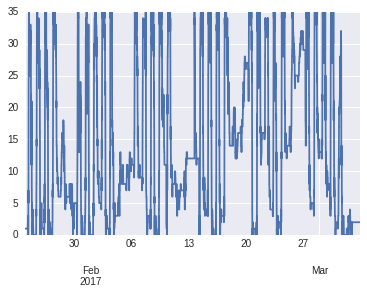

In [26]:
df0["FENIAN_STREET"].ix[:].plot()

# Feature Creation

In [25]:
df0["DOW"] = df0.index.dayofweek # day of week
df0["HOD"] = df0.index.hour # hour of day
df0["MOD"] = df0.index.hour*60 + df0.index.minute # minute of day

# Model init

In [40]:
station = "FENIAN_STREET"
feature_cols = ['DOW', 'MOD','HOD']
df = df0[[*feature_cols,"FENIAN_STREET"]]

# Test/Train create

In [41]:
cutoff_dt = datetime.datetime.strptime('2017-02-28 23:59:00', '%Y-%m-%d %H:%M:%S')
cutoff_dt_plus_one = datetime.datetime.strptime('2017-02-25 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.datetime.strptime('2017-03-04 00:00:00', '%Y-%m-%d %H:%M:%S')

train = df.ix[:cutoff_dt]
test = df.ix[cutoff_dt_plus_one:end_date]

### Need to figure out a way of creating "test windows" within the test set...